### Evaluación de métricas y variables de los modelos arborescentes

In [7]:
import sys
sys.path.append("../../") # go to parent dir

In [8]:
from modelos import *
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import numpy as np
from matplotlib.ticker import ScalarFormatter
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches
import pandas as pd
import calplot
from pandas import DatetimeIndex

In [9]:
pd.options.display.max_columns = 50 # para mostrar todas las columnas

#### Cargamos los datos de las metricas de MLFlow para evaluar los modelos

In [4]:
runs = pd.read_csv('runs/runs-forest.csv')
runs

,Start Time,Duration,Run ID,Name,Source Type,Source Name,User,Status,bootstrap,max_depth,min_samples_leaf,min_samples_split,n_estimators,random_state,CV_TEST_RMSE,CV_TRAIN_RMSE,RANDOM SEED,TEST_MAX_ERROR,TEST_MEAN_ABS_ERROR,TEST_MEDIAN_ABS_ERROR,TEST_ROOT_MEAN_SQ_ERROR,Training Info
0,2024-04-16 19:15:42,7.5s,cbed3e5de6034cf5a0d8b8a1abd2468a,esc_rf_con_random_search,LOCAL,C:\Users\dacoq\AppData\Roaming\Python\Python31...,dacoq,FINISHED,True,28.0,4.0,4.0,201.0,777,0.067188,0.027453,777,1.978516,0.288562,0.197869,0.409453,Random Forest donde los hiperparámetros se esc...
1,2024-04-16 19:14:17,6.4s,b39179c0a9b24076b8d8821e0dc00697,rf_con_random_search,LOCAL,C:\Users\dacoq\AppData\Roaming\Python\Python31...,dacoq,FINISHED,True,28.0,4.0,4.0,201.0,777,0.067072,0.027439,777,1.986102,0.289991,0.198792,0.410915,Random Forest donde los hiperparámetros se esc...
2,2024-04-16 19:30:16,8.9s,946fb71d57bb4c2d9bc6694f18e14ddd,esc_rf_con_grid_search,LOCAL,C:\Users\dacoq\AppData\Roaming\Python\Python31...,dacoq,FINISHED,True,28.0,1.0,2.0,600.0,777,0.055258,0.007702,777,2.048167,0.290559,0.201750,0.411053,Random Forest donde los hiperparámetros se esc...
3,2024-04-16 19:12:47,5.7s,88be7822a72c4abeb270d58b97a20877,esc_random_forest_basico,LOCAL,C:\Users\dacoq\AppData\Roaming\Python\Python31...,dacoq,FINISHED,NaN,10.0,NaN,NaN,NaN,777,0.266816,0.180749,777,2.114229,0.290048,0.199611,0.412287,Random Forest con todos los hiperparámetros pr...
4,2024-04-16 19:23:15,9.9s,ccdda39708db4ad0be2123eb7470ec14,rf_con_grid_search,LOCAL,C:\Users\dacoq\AppData\Roaming\Python\Python31...,dacoq,FINISHED,True,NaN,1.0,2.0,600.0,777,0.055067,0.007699,777,2.036500,0.292274,0.202167,0.412811,Random Forest donde los hiperparámetros se esc...
5,2024-04-16 19:12:17,8.6s,121bb659f64844cd85fc5a84ef411533,random_forest_basico,LOCAL,C:\Users\dacoq\AppData\Roaming\Python\Python31...,dacoq,FINISHED,NaN,10.0,NaN,NaN,NaN,777,0.266858,0.180830,777,2.131048,0.291529,0.200925,0.413897,Random Forest con todos los hiperparámetros pr...


### RAIZ DE ECM por SUBCONJUNTOS

Pasamos a ver la diferencia entre el error (raiz del error cuadratico medio) de test de validación(CV_TEST_RMSE) con el error de train de validación (CV_TRAIN_RMSE) y el error sobre TEST (TEST_ROOT_MEAN_SQ_ERROR)

Text(0.5, 0, 'metros')

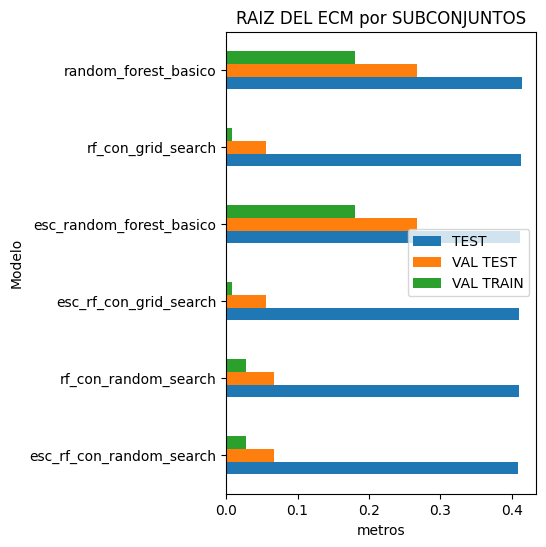

In [5]:
fig, ax = plt.subplots(figsize=(4,6))
runs = runs.sort_values(by='TEST_ROOT_MEAN_SQ_ERROR')

runs.plot(x = 'Name', y = ['TEST_ROOT_MEAN_SQ_ERROR', 'CV_TEST_RMSE', 'CV_TRAIN_RMSE' ], kind = 'barh', ax=ax)
plt.legend(['TEST', 'VAL TEST', 'VAL TRAIN'], loc='center right')
ax.set_title('RAIZ DEL ECM por SUBCONJUNTOS')
ax.set_ylabel('Modelo')
ax.set_xlabel('metros')

#### Viendo esta gráfica podemos apreciar que el error sobre test suele estar muy por encima de los errores de validación

#### Entre los conjuntos de validación, también podemos destacar que el error de train es menor que el error de test

#### Además, comentar que el error del test es muy similar entre modelos

### Otras métricas sobre el conjunto TEST
#### Asignamos los colores al mismo modelo para que coincidan en las graficas posteriores

In [6]:
colors = ['#6CCFF6', '#BFF6FF', '#FF95FD', '#FFF93E', 'green', 'red']
dictCol = dict(zip(runs.Name.unique(), colors))
runs['color'] = runs.Name.map(dictCol)

#### Error absoluto medio

Al no usar cuadrados y raices es una métrica más precisa del error

Text(0.5, 0, 'metros (escala logaritmica)')

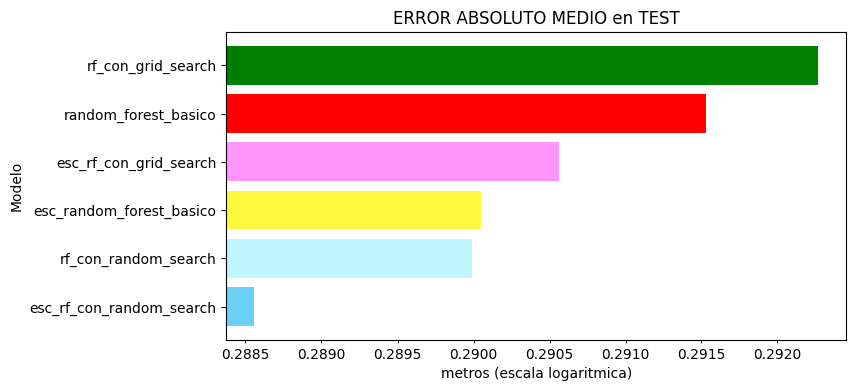

In [7]:
fig, ax = plt.subplots(figsize=(8,4))
runs = runs.sort_values(by='TEST_MEAN_ABS_ERROR')

ax.barh(y = runs['Name'], width = runs['TEST_MEAN_ABS_ERROR'], color=runs.color)
ax.set_title('ERROR ABSOLUTO MEDIO en TEST')
# escala logaritmica
ax.set_xscale('log')
ax.xaxis.set_minor_formatter(ScalarFormatter())
ax.set_ylabel('Modelo')
ax.set_xlabel('metros (escala logaritmica)')

En este caso vemos que varía bastante el rango de este error con respecto a la raiz de ECM, es menor (hasta 0,5 en vez de 0,7 para raiz de ECM)

#### Mediana del error absoluto

En vez de usar la media, usamos la mediana para que no afecten tanto los errores extremos

Text(0.5, 0, 'metros (escala logaritmica)')

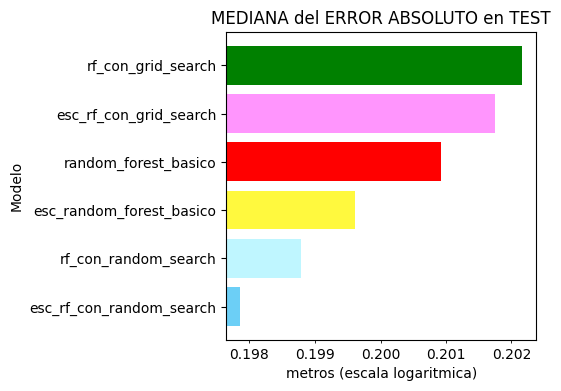

In [8]:
fig, ax = plt.subplots(figsize=(4,4))
runs = runs.sort_values(by='TEST_MEDIAN_ABS_ERROR')

ax.barh(y = runs['Name'], width = runs['TEST_MEDIAN_ABS_ERROR'], color=runs.color)
ax.set_title('MEDIANA del ERROR ABSOLUTO en TEST')
# escala logaritmica
ax.set_xscale('log')
ax.xaxis.set_minor_formatter(ScalarFormatter())
ax.set_ylabel('Modelo')
ax.set_xlabel('metros (escala logaritmica)')

En este caso también el rango baja respecto la anterior gráfica (no llega a 0,5 como en la anterior). Esto es lógico, pues en el anterior gráfico al coger la media se ve afectada por valores más extremos.

#### Error máximo:
Métrica importante y nos ayudará a tener en cuenta que modelos pueden funcionar mejor para predecir alturas de olas de todos los rangos

Text(0.5, 0, 'metros (escala logaritmica)')

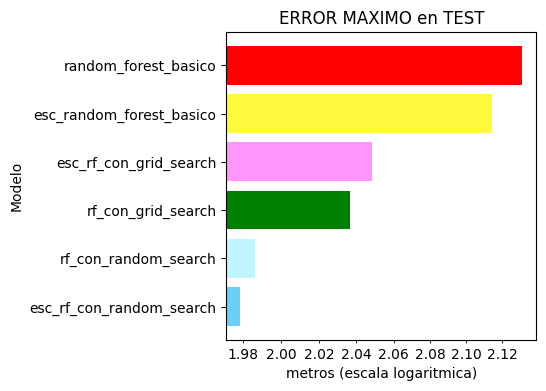

In [9]:
fig, ax = plt.subplots(figsize=(4,4))
runs = runs.sort_values(by='TEST_MAX_ERROR')

ax.barh(y = runs['Name'], width = runs['TEST_MAX_ERROR'], color=runs.color)
# escala logaritmica
ax.set_xscale('log')
ax.xaxis.set_minor_formatter(ScalarFormatter())
ax.set_title('ERROR MAXIMO en TEST')
ax.set_ylabel('Modelo')
ax.set_xlabel('metros (escala logaritmica)')

#### Vemos que los primeros tres gráficos no muestran diferencias mayores de 1 centimetro entre dos modelos. En la comparación del error máximo la diferencia puede llegar a unos 7 cm, pero aún así no es realmente muy importante. Por ello seguramente el modelo que seleccionemos sea el elastic con selecion manual encontrado con random search (color marron). Pues este modelo tiene menos variables que el modelo con todas las variables y la diferencia en el error maximo no es muy alta.

### Análisis de importancia de variables (valores de los coeficientes)

En esta seccion analisaremos los coeficientes de las variables en los modelos seleccionados.

In [10]:
# cargamos datos
X_train, X_test, y_train, y_test = sep_train_test()

#### Lo haremos separado para modelos escalados.y sin escalar, pues realmente no es una comparación igualada (aunque mas abajo lo juntaremos para ver las diferencias)

In [11]:
# las variables usadas en modelos sin utilizar seleccion
all_coef = X_train.drop(columns=["Temperatura", 'wspd', 'anio', 'mes', 'dia', 'hora']).columns

flo = MLFlow()

# cargamos los modelos con sus variables respectivas

# models_sin_esc = [{'name': m, 'model': flo.get_saved_model(m), 'feature_names': all_coef} for m in runs if 'esc' not in m]
m = "esc_rf_con_random_search"
models_sin_esc = [{'name': m, 'model': flo.get_saved_model(m), 'feature_names': all_coef}]

# models_escalados = [{'name': m, 'model': flo.get_saved_model(m), 'feature_names': all_coef} for m in runs if 'esc' in m]

C:\Users\dacoq\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlflow\store\artifact\utils\models.py:32: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/2.11.3/model-registry.html#migrating-from-stages
  latest = client.get_latest_versions(name, None if stage is None else [stage])


#### Funcion auxiliar para guardar los datos correctamente para poder crear visualizaciones

In [12]:
def feat_weights_df(models):
    featureWeights = []
    for i,c in enumerate(all_coef):
        for item in models:
            featW = {'model': item['name'], 'coef': 0, 'color': 'black'}
    
            if (item['feature_names'] == c).sum() > 0: # si existe el coeficiente en el modelo
                featW['coef'] = item['model'].feature_importances_[item['feature_names'] == c][0]
                # color rojo indica que el coeficiente es negativo
                featW['color'] = 'blue' if featW['coef'] > 0 else 'red'
                featW['coef'] = abs(featW['coef'])
    
            featW['coef_name'] = c
            
            featureWeights.append(featW)
    # convertimos lista a dataframe
    return pd.DataFrame(featureWeights)

#### Funcion que se encargara de mostrar una rejilla de graficos para cada variable de cual es su peso en diferentes modelos

In [15]:
def mostrar_importancias(featureWeights, title):
    # ordenamos por coeficientes para que al mostrar sea mas facil evaluar
    featureWeights = featureWeights.sort_values(by = 'coef', ascending=False)
    
    fig, axs = plt.subplots(8,4, figsize=(15,30))
    fig.suptitle(title, fontsize=24)
    for i,c in enumerate(featureWeights.coef_name.unique()):
        df_temp = featureWeights[featureWeights.coef_name == c]
        df_temp = df_temp.sort_values(by='model')
        ax = axs[i//4, i%4]
        ax.barh(df_temp.model, df_temp.coef, color = df_temp.color)
        if i % 4 > 0:
            ax.set_yticks([])
        ax.set_title(c, fontweight='bold')
        ax.set_xticks([i/20 for i in range(0, 22, 5)])
        
    # leyenda custom
    # axs[0, 1].legend(handles=[mpatches.Patch(color='red', label='< 0'), mpatches.Patch(color='blue', label='> 0')])
    axs[7,3].axis('off')

#### Mostramos graficos para datos SIN escalar

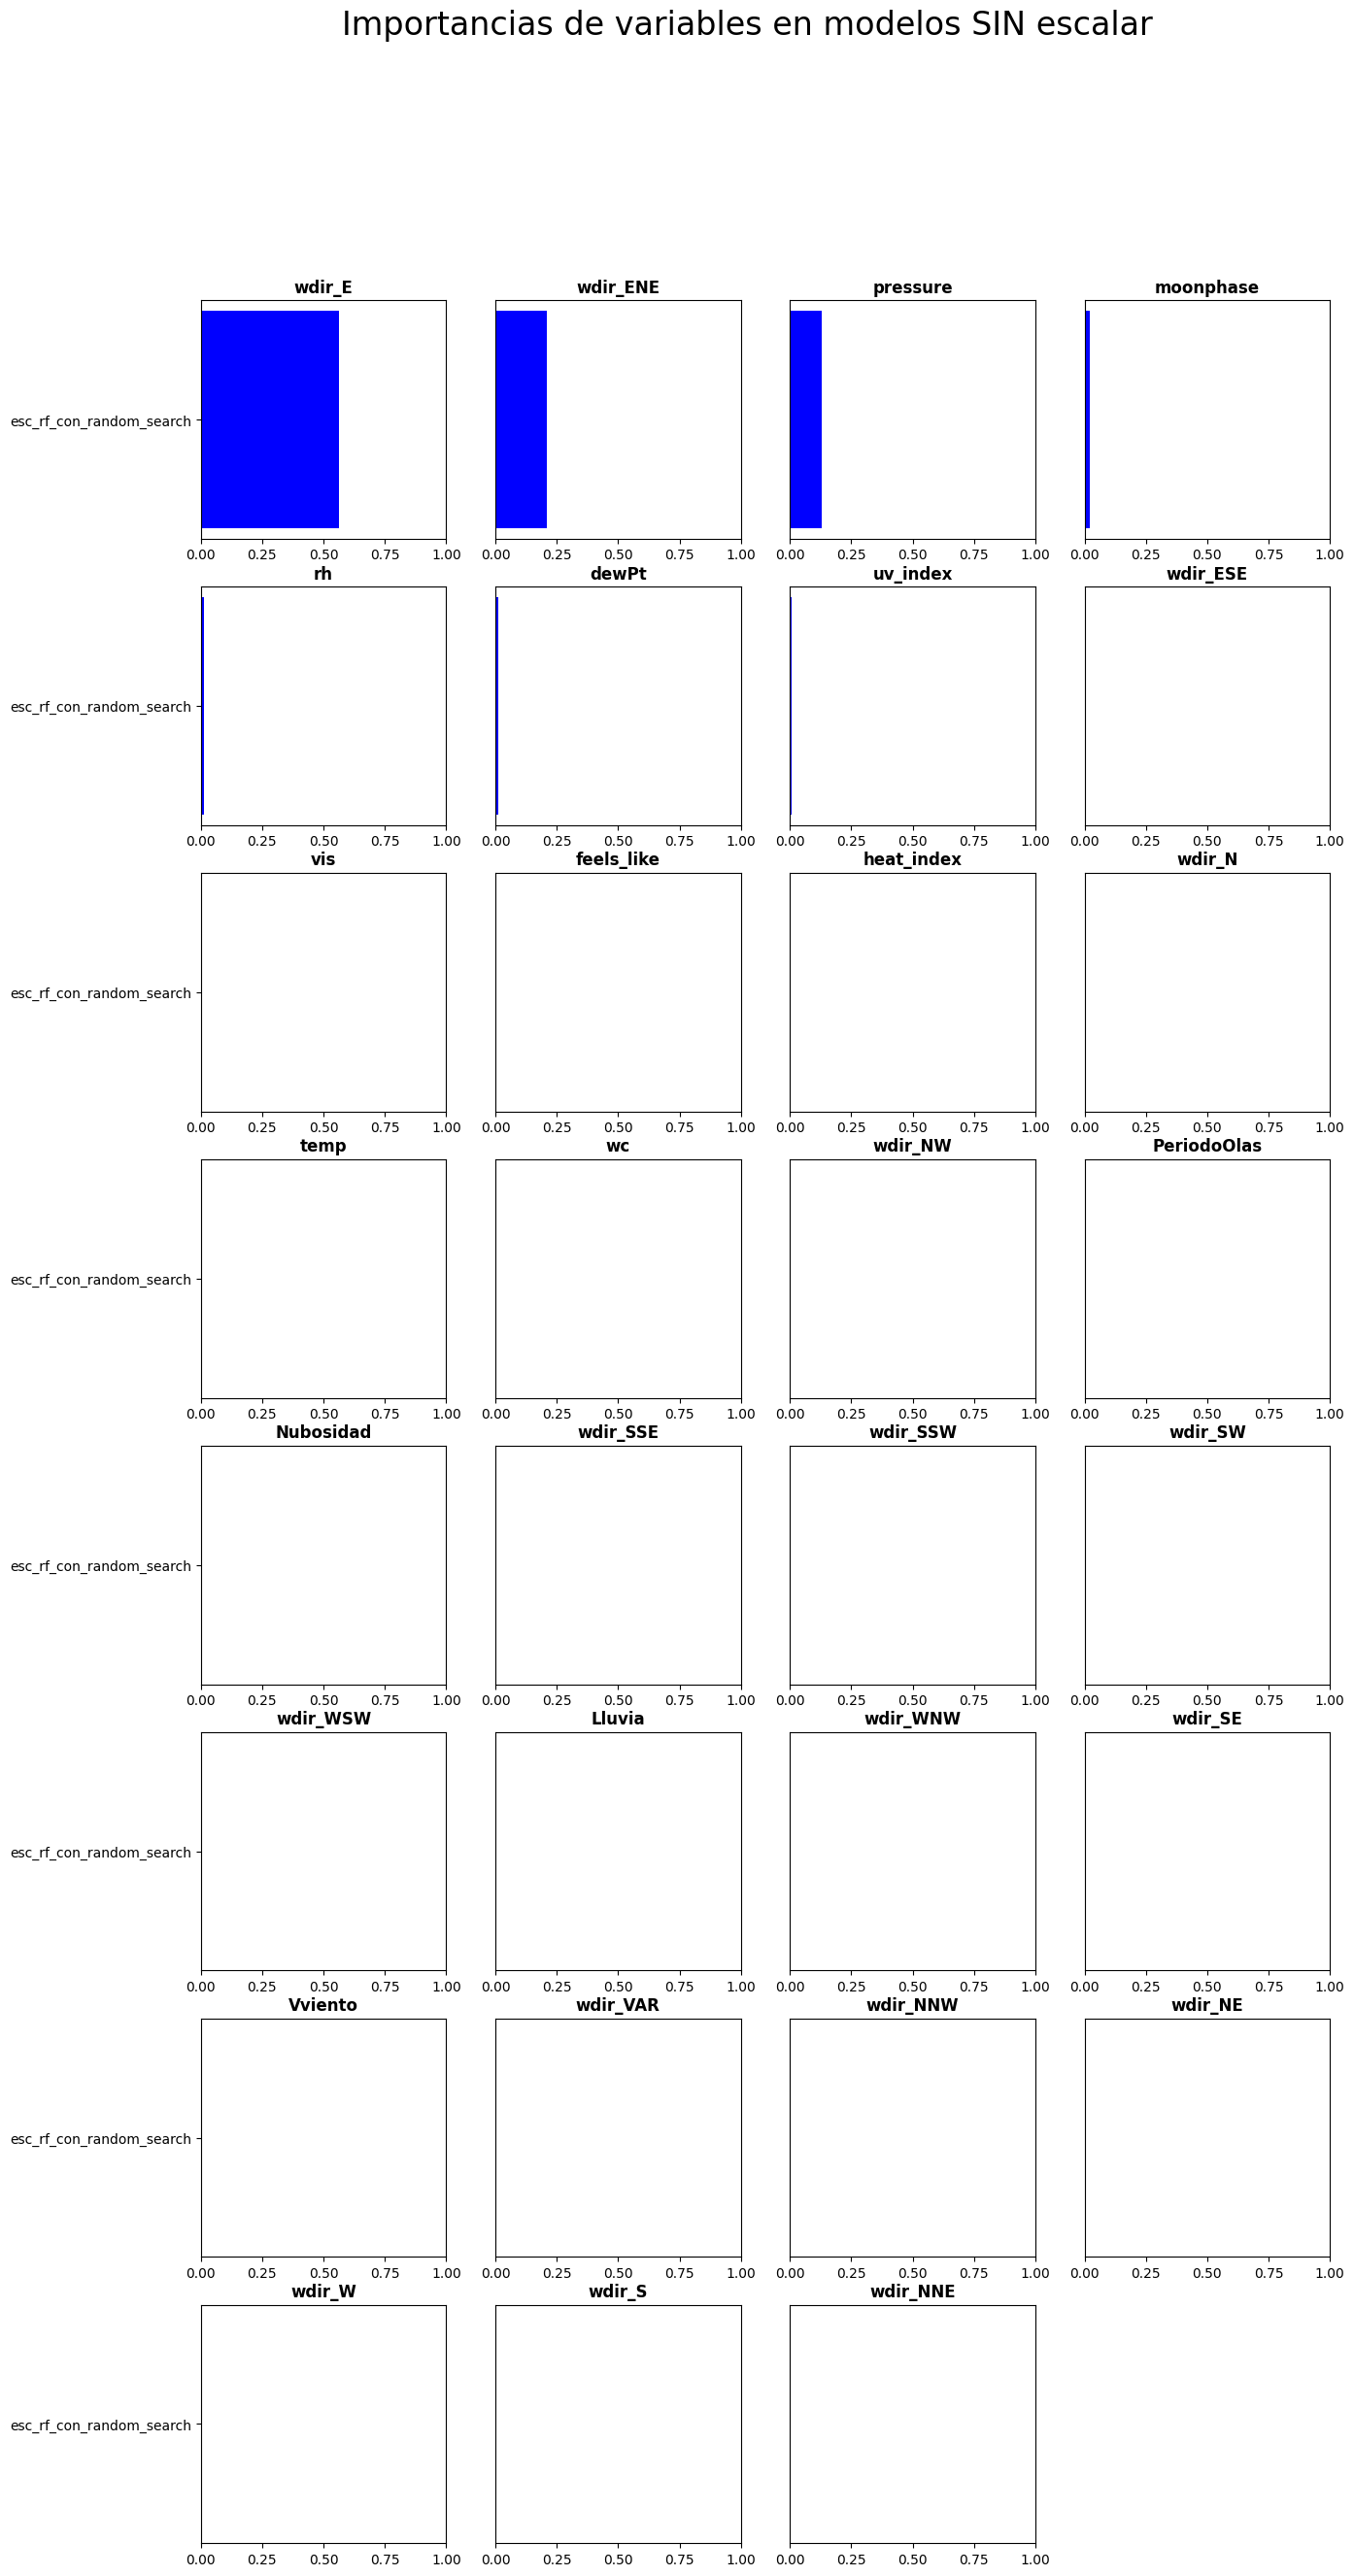

In [16]:
mostrar_importancias(feat_weights_df(models_sin_esc), "Importancias de variables en modelos SIN escalar")

#### En este caso, las variables de mayor peso son la presion y la direcion del viento en direccion Norte. Los coeficientes son muy parecidos, esto se debe a que 4 de 5 modelos son ELASTIC. Veamos si esto cambia para modelos escalados.

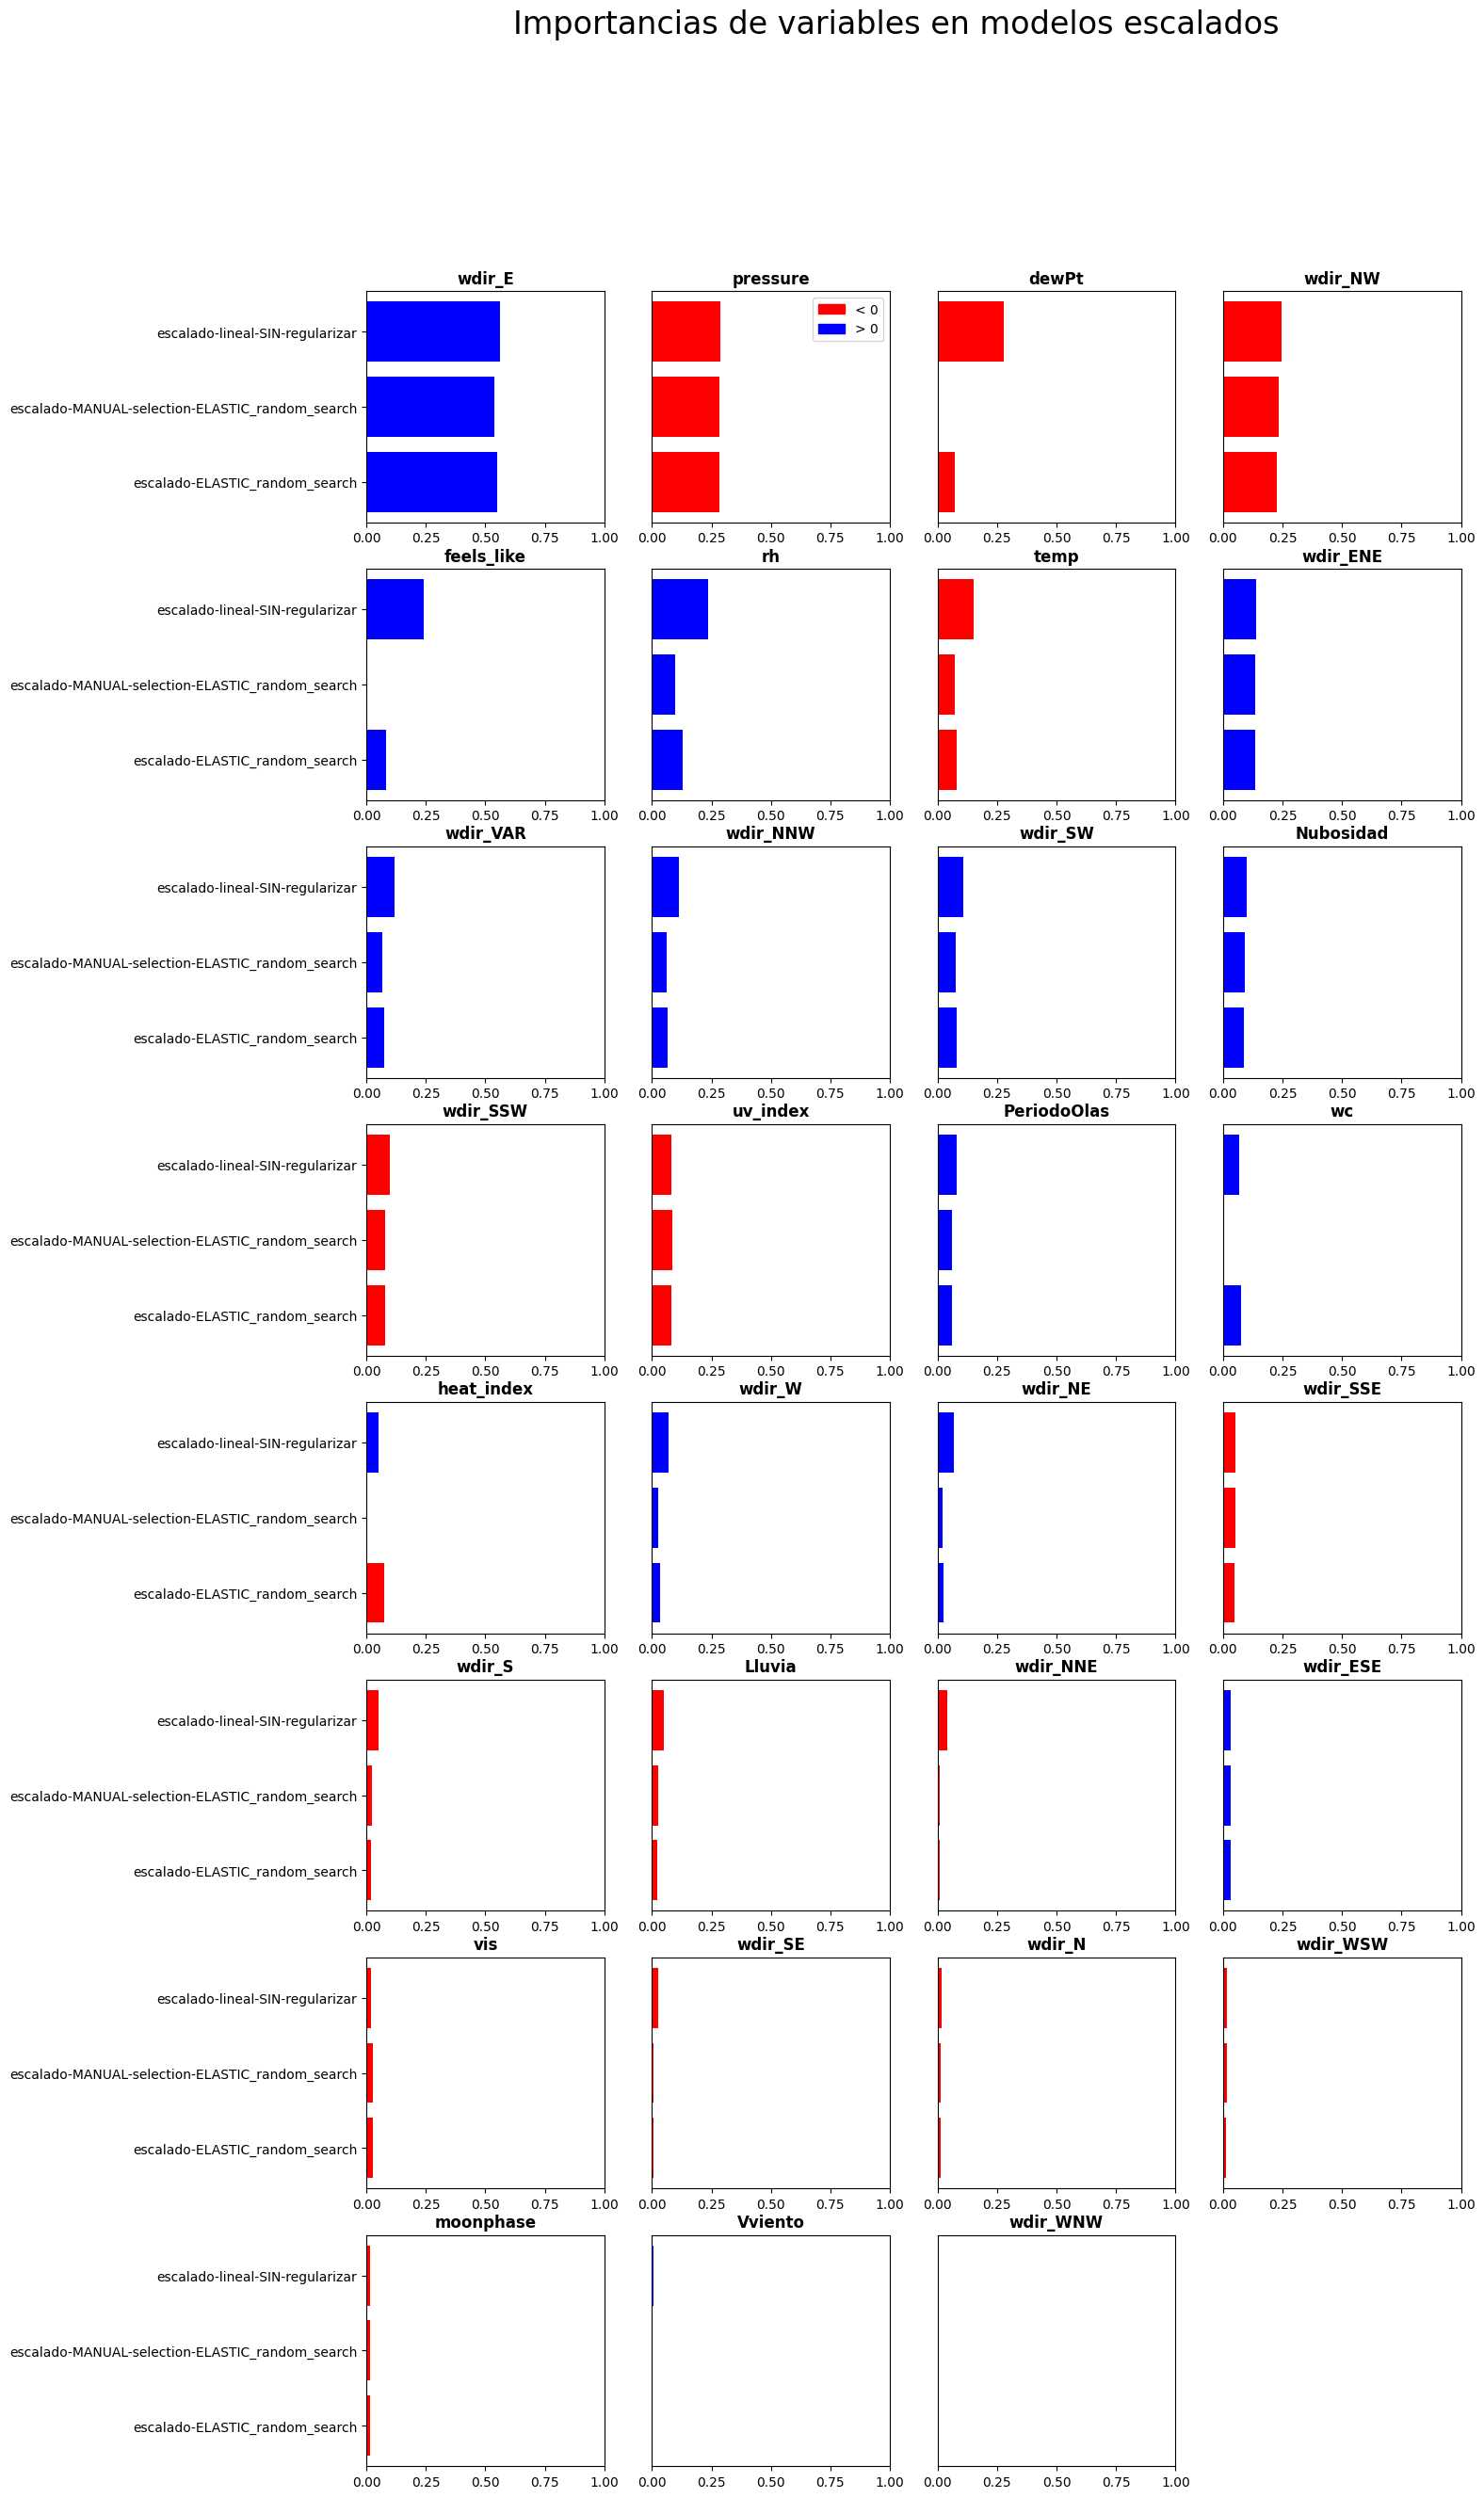

In [20]:
mostrar_importancias(feat_weights_df(models_escalados), "Importancias de variables en modelos escalados")

### Análisis de gráficas de dispersión (Y_true vs Y_predicted) por segmentos (Alturas de olas)

##### Separamos las olas en 4 grupos por rangos de altura:

In [17]:
def class_ola(ola):
    if (ola < 1):
        return "x<1"
    if (ola < 2):
        return "1<x<2"
    if (ola < 3):
        return "2<x<3"
    else:
        return "x>3"

<Axes: title={'center': 'Segmentación de olas'}>

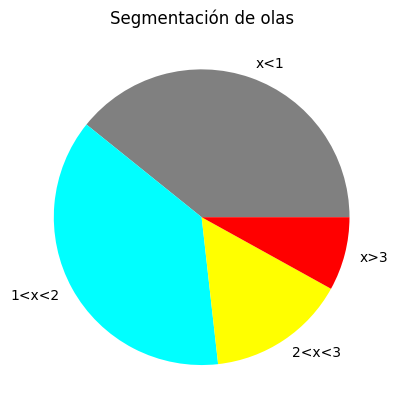

In [18]:
ola_clas = y_test.map(class_ola)
ola_clas.value_counts().plot(kind='pie', label='', title='Segmentación de olas', colors=['gray', "aqua", "yellow", "red"])

#### Funcion auxiliar para poder convertir el dataframe de test en uno lo que tiene que recibir el modelo como input

In [19]:
# Devuelve df_test modificado para que lo acepte el modelo m para hacer predict
def to_model_input(df_train, df_test, m):
    # Eliminamos las columnas repetidas y las columnas temporales (visto en el notebook del analisis)
    input_test = df_test.drop(columns=["Temperatura", 'wspd', 'anio', 'mes', 'dia', 'hora'])
    input_train = df_train.drop(columns=["Temperatura", 'wspd', 'anio', 'mes', 'dia', 'hora'])
    # if "auto" in m: no hay modelos automaticos, su rendimiento es muy bajo
    if "MANUAL" in m: # quitamos columnas
        cols = ['moonphase', 'temp', 'rh', 'pressure',
       'vis', 'uv_index', 'wdir_E', 'wdir_ENE', 'wdir_ESE', 'wdir_N',
       'wdir_NE', 'wdir_NNE', 'wdir_NNW', 'wdir_NW', 'wdir_S', 'wdir_SE',
       'wdir_SSE', 'wdir_SSW', 'wdir_SW', 'wdir_VAR', 'wdir_W', 'wdir_WNW',
       'wdir_WSW', 'Vviento', 'PeriodoOlas', 'Lluvia', 'Nubosidad']
        input_test = input_test[cols]
        input_train = input_train[cols]
    if "escalado" in m: # escalamos datos
        scaler = ColumnTransformer(
            transformers=[
                # no escalonamos las dummy de dirección de viento
                ("num", StandardScaler(), [c for c in input_train.columns if not c.startswith('wdir_')]),
            ],
            remainder='passthrough'
        )
        scaler.fit(input_train)
        input_test = scaler.transform(input_test)
    
    return input_test

In [27]:
'''
for m in best_models:
    fig, axs = plt.subplots(2, 2, figsize=(6, 6))
    fig.suptitle(m)
    flo = MLFlow()
    # cargamos el modelo
    model = flo.get_saved_model(m)
    y_pred = model.predict(to_model_input(X_train, X_test, m))
    olas_err = pd.DataFrame({"ola": ola_clas, "error": y_pred - y_test})
    for i, o in enumerate(['x<1', '1<x<2', '2<x<3', 'x>3']):
        ax = axs[i//2, i%2]
        ax.hist(olas_err[olas_err["ola"] == o].error, density=True)
        ax.set_title(o)
        ax.legend()
        #ax.set_xticks(np.linspace(-3, 5, 9))
        #ax.set_yticks(np.linspace(0, 2, 11))
'''

'\nfor m in best_models:\n    fig, axs = plt.subplots(2, 2, figsize=(6, 6))\n    fig.suptitle(m)\n    flo = MLFlow()\n    # cargamos el modelo\n    model = flo.get_saved_model(m)\n    y_pred = model.predict(to_model_input(X_train, X_test, m))\n    olas_err = pd.DataFrame({"ola": ola_clas, "error": y_pred - y_test})\n    for i, o in enumerate([\'x<1\', \'1<x<2\', \'2<x<3\', \'x>3\']):\n        ax = axs[i//2, i%2]\n        ax.hist(olas_err[olas_err["ola"] == o].error, density=True)\n        ax.set_title(o)\n        ax.legend()\n        #ax.set_xticks(np.linspace(-3, 5, 9))\n        #ax.set_yticks(np.linspace(0, 2, 11))\n'

#### Asignamos colores a los diferentes rangos para visualizar los segmentos en los graficos de dispersion

In [20]:
def ola_color(ola):
    if (ola < 1):
        return "gray"
    if (ola < 2):
        return "aqua"
    if (ola < 3):
        return "yellow"
    else:
        return "red" 

/Users/tyomikjan/UNIVERSITY/PD1/PD/venv/lib/python3.11/site-packages/mlflow/store/artifact/utils/models.py:32: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/2.11.3/model-registry.html#migrating-from-stages
  latest = client.get_latest_versions(name, None if stage is None else [stage])
/Users/tyomikjan/UNIVERSITY/PD1/PD/venv/lib/python3.11/site-packages/mlflow/store/artifact/utils/models.py:32: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/2.11.3/model-registry.html#migrating-from-stages
  latest = client.get_latest_versi

Text(0.5, 0.98, 'Alturas de olas: PREDICTED vs TRUE')

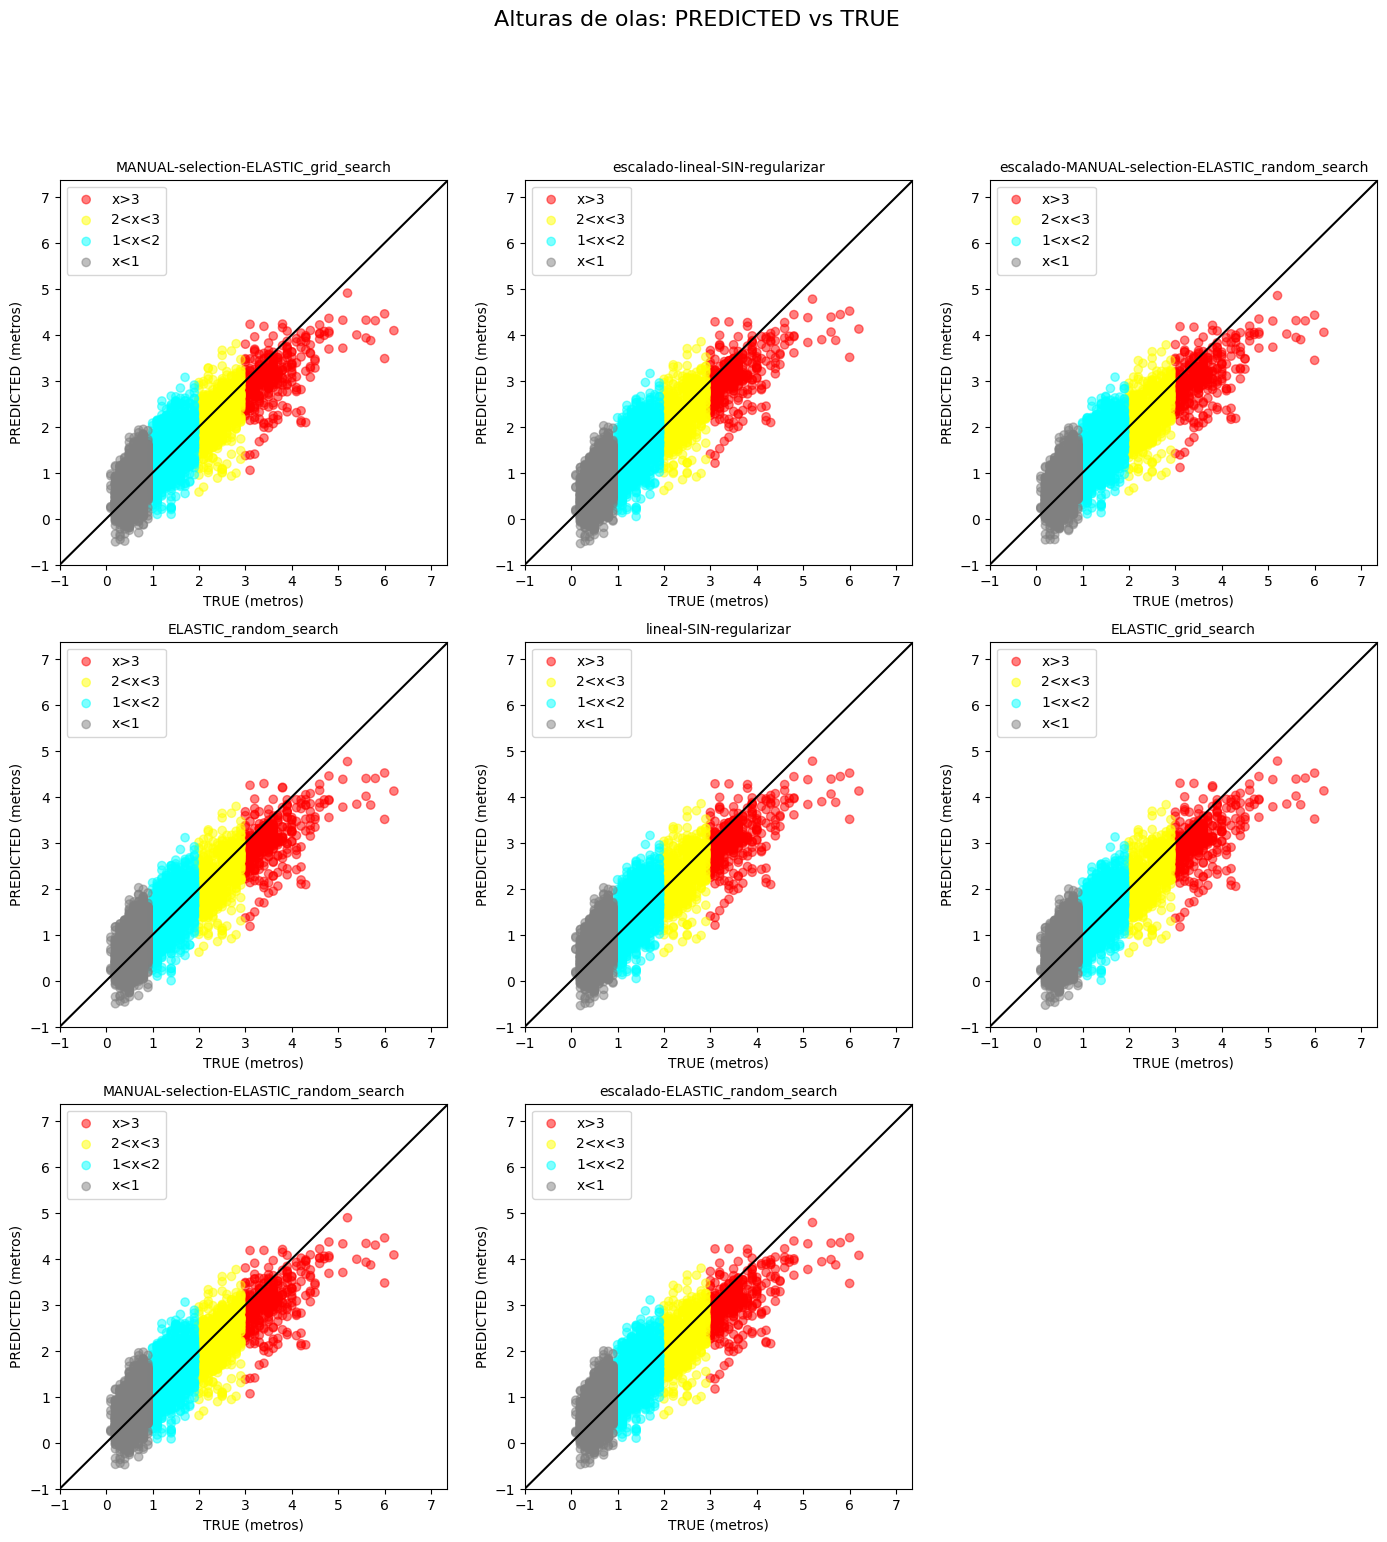

In [29]:
fig, axs = plt.subplots(3, 3, figsize=(17, 17))
for i,m in enumerate(best_models):
    ax = axs[i//3, i%3]
    flo = MLFlow()
    # cargamos el modelo
    model = flo.get_saved_model(m)
    y_pred = model.predict(to_model_input(X_train, X_test, m))
    for cl in ola_clas.unique():
        filter = ola_clas == cl
        ax.scatter(y_test[filter], y_pred[filter], color=y_test[filter].map(ola_color), alpha=0.5)
    
    # nuestra recta - objetivo
    ax.axline((0, 0), (7, 7), color="0")
    ax.legend(["x>3", "2<x<3", "1<x<2", "x<1"], loc='upper left')
    ax.set_xlabel('TRUE (metros)')
    ax.set_ylabel('PREDICTED (metros)')
    ax.set_title(m, fontsize=10)
    ax.set_xticks(np.linspace(-1, 7, 9))
    ax.set_yticks(np.linspace(-1, 7, 9))
axs[2,2].axis('off')
fig.suptitle('Alturas de olas: PREDICTED vs TRUE', fontsize=16)

Vemos que nuestros modelos llegan a predecir olas negativas, lo cual se podria funcionar devolviendo el maximo entre la prediccion y el 0

`return np.maximum(y_pred, 0)`

Además, nunca devuelve una altura de olas superior a 5 metros, además los errores del grupo de olas más altas es el más disperso, lo cual indica que la técnica lineal puede no ser la mejor para resolver este problema a partir de los datos que tenemos

Pero de resto, estos modelos, como en las anteriores evaluaciones, siguen siendo muy parecidos en los gráficos de disperción.

#### Analisis de errores por dias

En esta sección analizaremos los errores viendolos como en un calendario

Primero vemos las distribuciones de olas por dias en nuestro conjunto TEST

Para ello primero definimos una función auxiliar para mostrar los datos en formato calendario

In [30]:
def plot_calendar(X_data, y_data, title, cmap = None, **kwargs):
    # unimos las columnas temporales con la y
    date_height_df = pd.concat([X_data[['anio', 'mes', 'dia', 'hora']].reset_index(drop=True), y_data.reset_index(drop=True)], axis=1)
    # renombramos las columnas para que se pueda convertir a datetimeindex
    date_height_df = date_height_df.rename({'anio': 'year', 'mes': 'month', 'dia': 'day', 'hora': 'hour'}, axis='columns')
    
    date_height_df.set_index(DatetimeIndex(pd.to_datetime(date_height_df[['year', 'month', 'day']])), inplace=True)
    # ya no necesitamos esta informacion, la tenemos en el indice
    date_height_df.drop(columns=['year', 'month', 'day'], inplace=True)
    
    # tenemos que agregar con la media porque son datos por hora y necesitamos los datos por dia
    date_height_df = date_height_df.groupby(date_height_df.index).agg({'AlturaOlas': 'mean'})
    if cmap is None:
        # para los colores https://stackoverflow.com/questions/16834861/create-own-colormap-using-matplotlib-and-plot-color-scale
        cvals  = [0, 1, 2, 3]
        colors = ['gray', "aqua", "yellow", "red"]
        
        norm=plt.Normalize(min(cvals),max(cvals))
        tuples = list(zip(map(norm,cvals), colors))
        cmap = LinearSegmentedColormap.from_list("", tuples)
    # mostramos el grafico
    calplot.calplot(date_height_df.AlturaOlas,
                    suptitle = title,
                    suptitle_kws = {'x': 0.4, 'y': 1.0, 'fontsize': 16},
                    cmap=cmap,
                    figsize=(15,4),
                    **kwargs)

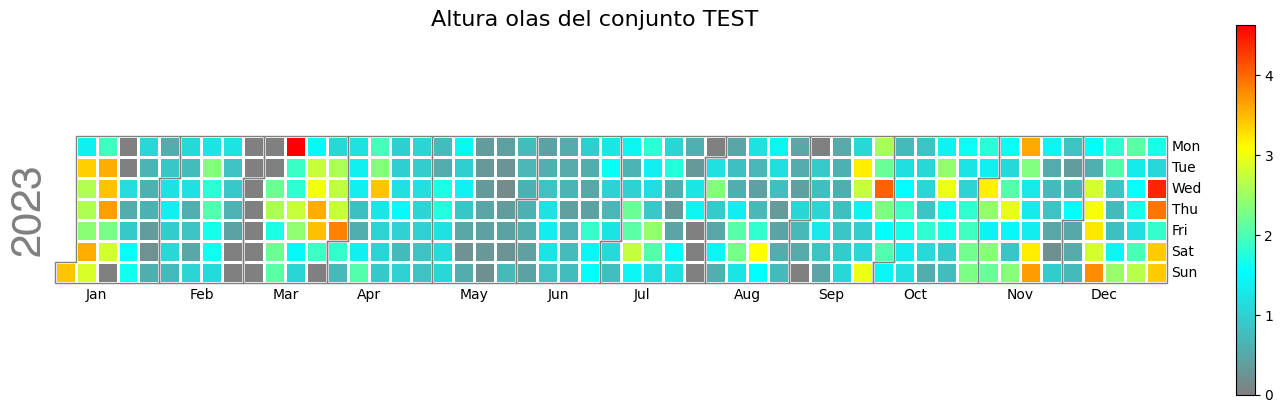

In [31]:
plot_calendar(X_test, y_test, 'Altura olas del conjunto TEST')

#### Vemos que las olas mayores de 3 metros se concentran principalmente en ENERO, MARZO y DICIEMBRE

#### Ahora pasamos a ver los errores del modelo cometidos en formato de calendario

#### El color azul significa que hemos SOBREESTIMADO la ola (subimos expectativas) y el color rojo que la hemos SUBESTIMADO (supone mayor riesgo al cliente)

##### Primero hacemos las graficas con colores que vayan del minimo al maximo para ver donde estan los mayores errores

/Users/tyomikjan/UNIVERSITY/PD1/PD/venv/lib/python3.11/site-packages/mlflow/store/artifact/utils/models.py:32: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/2.11.3/model-registry.html#migrating-from-stages
  latest = client.get_latest_versions(name, None if stage is None else [stage])
/Users/tyomikjan/UNIVERSITY/PD1/PD/venv/lib/python3.11/site-packages/mlflow/store/artifact/utils/models.py:32: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/2.11.3/model-registry.html#migrating-from-stages
  latest = client.get_latest_versi

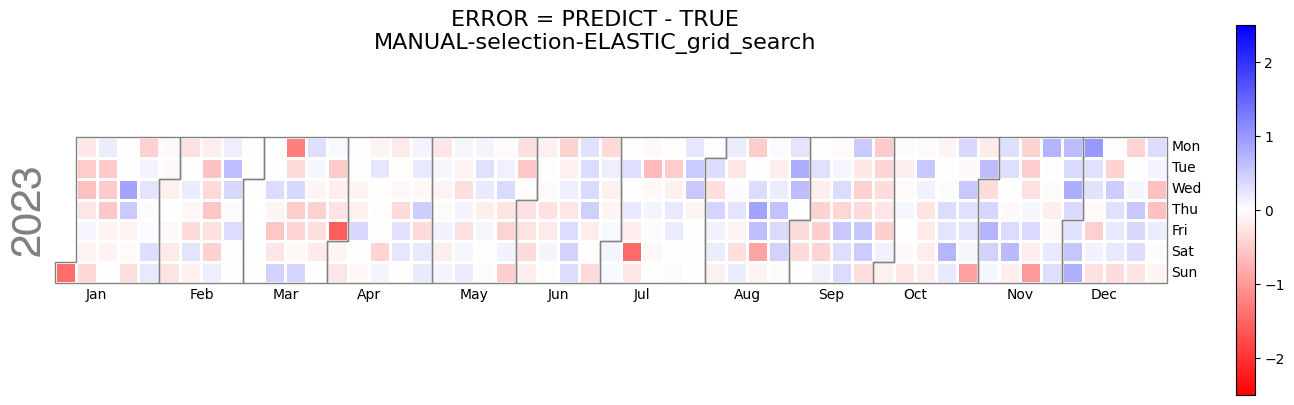

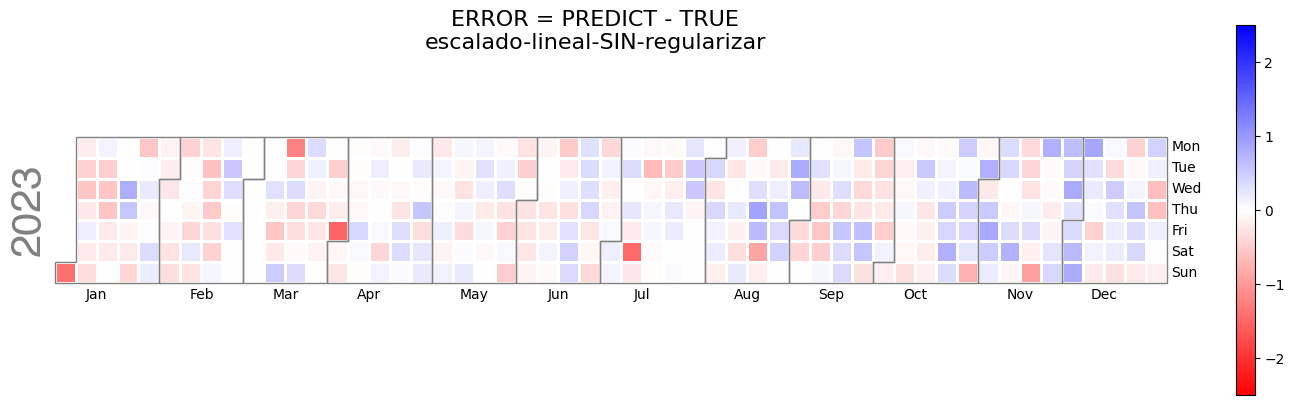

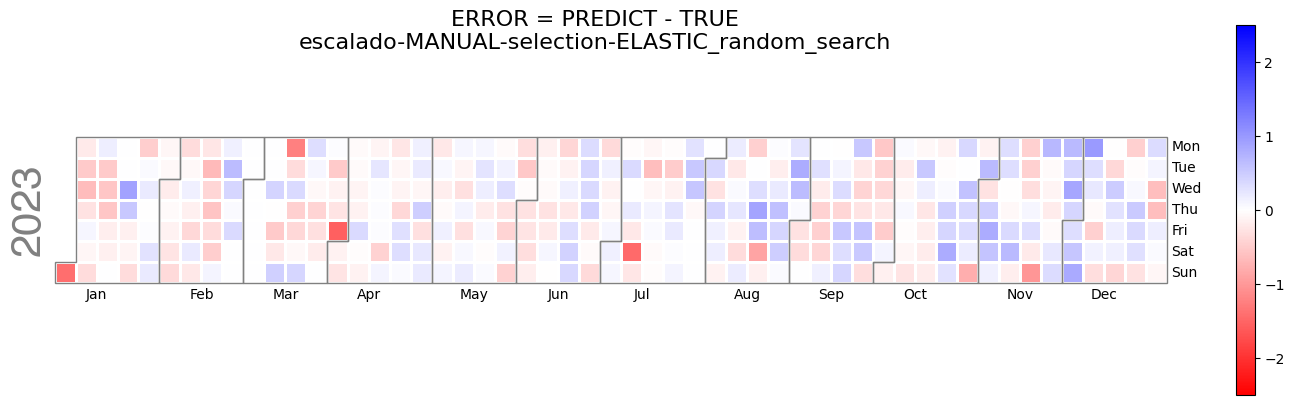

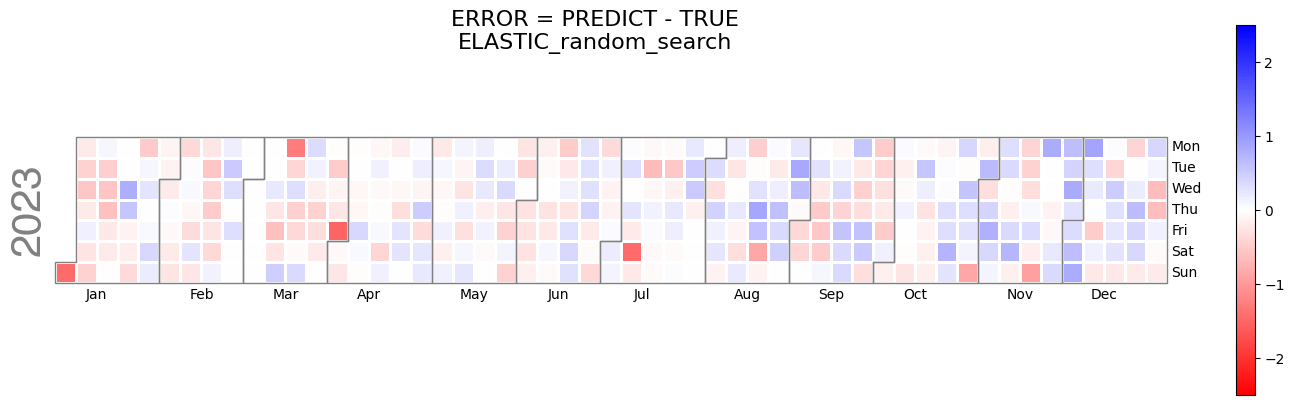

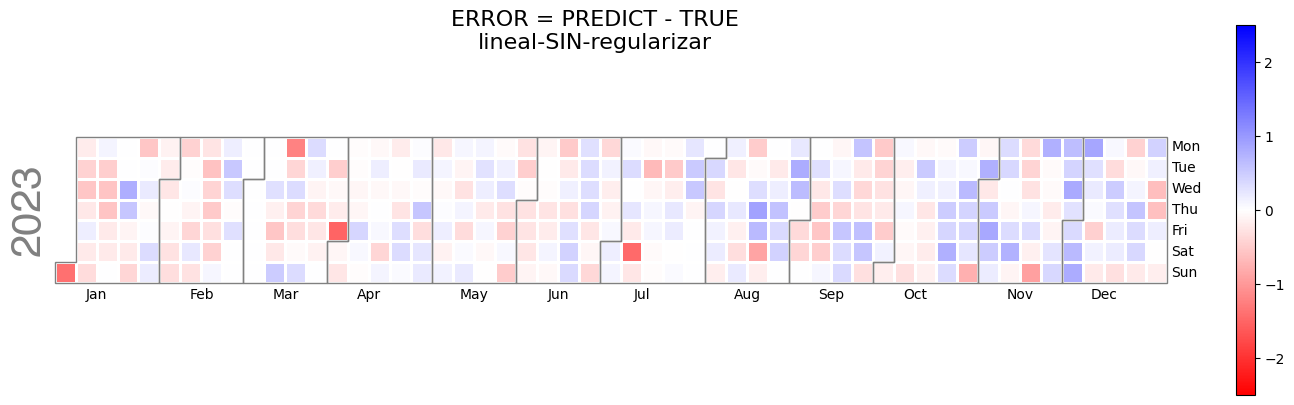

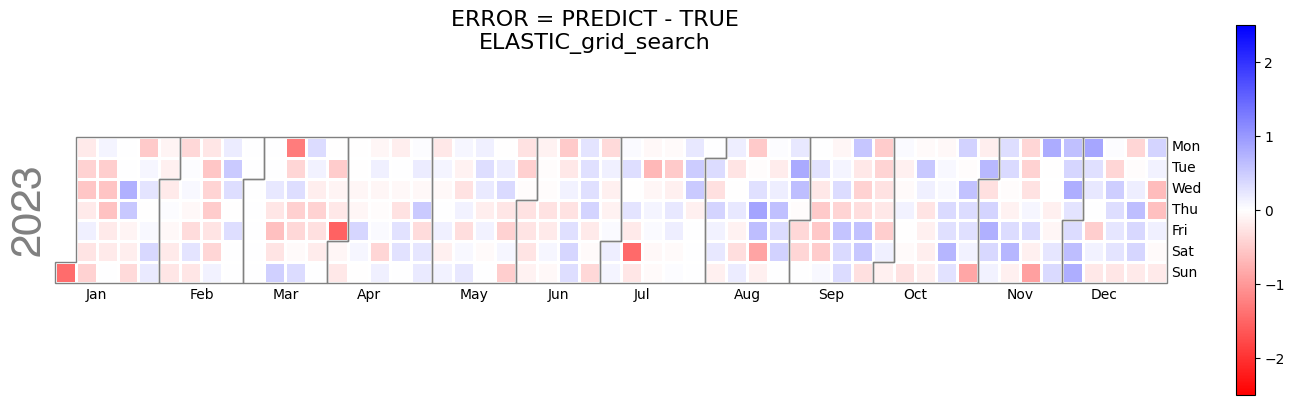

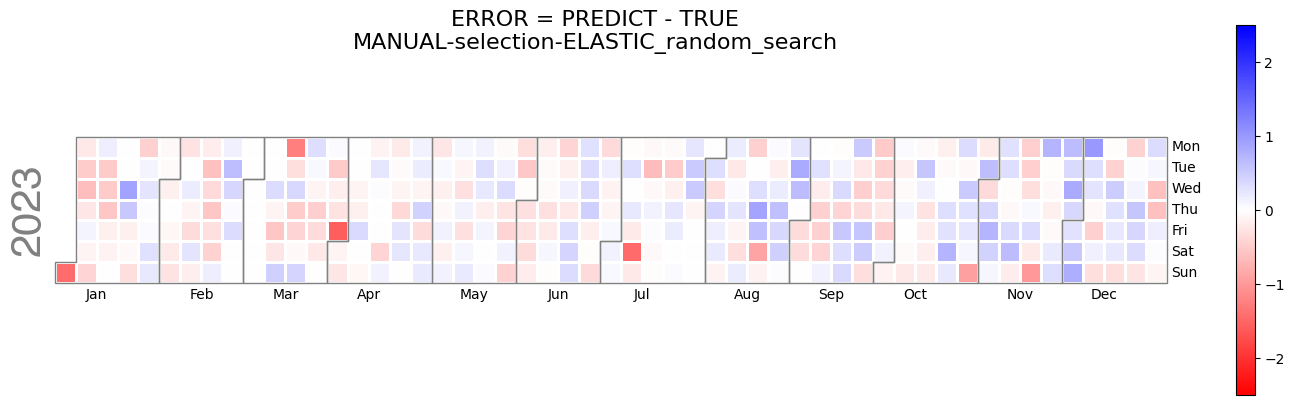

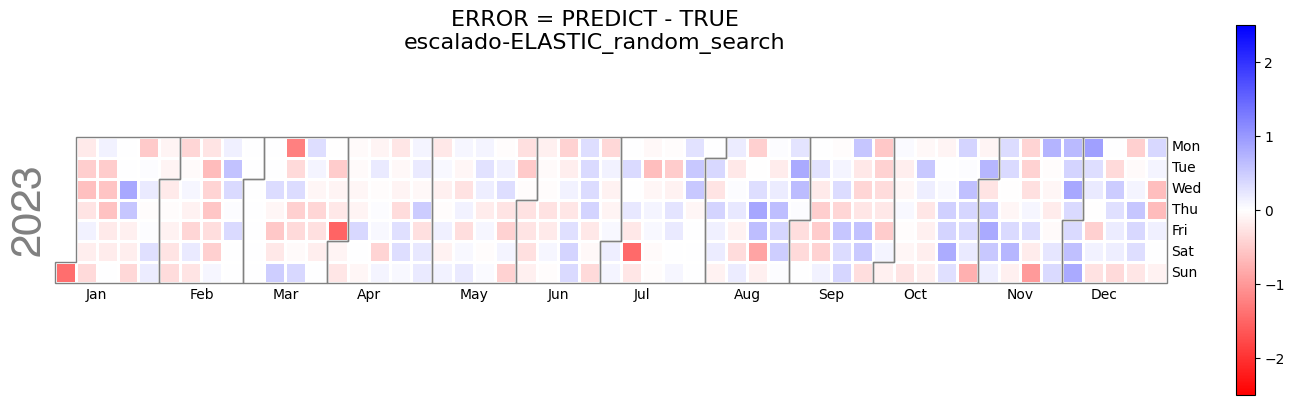

In [32]:

for i,m in enumerate(best_models):
    flo = MLFlow()
    # cargamos el modelo
    model = flo.get_saved_model(m)
    # pasamos numpy a Series
    y_pred = model.predict(to_model_input(X_train, X_test, m))
    
    diff = y_pred - y_test
    # para los colores https://stackoverflow.com/questions/16834861/create-own-colormap-using-matplotlib-and-plot-color-scale
    cvals  = [-2.5, 0, 2.5]
    colors = ['red', '1', 'blue']
    
    norm=plt.Normalize(min(cvals),max(cvals))
    tuples = list(zip(map(norm,cvals), colors))
    cmap = LinearSegmentedColormap.from_list("", tuples)
    plot_calendar(X_test, diff, 'ERROR = PREDICT - TRUE\n' + m, cmap, vmin=-2.5, vmax=2.5)


#### Vemos la presencia de 4 fallos extremos, 1 de ellos se corresponde con una ola grande, otros con olas medianas.

#### Ahora hacemos las graficas para tener una vision con limite de -1.5, 1.5 para que se vea mejor la diferencia entre los errores (los fallos extremos se notarán menos)

/Users/tyomikjan/UNIVERSITY/PD1/PD/venv/lib/python3.11/site-packages/mlflow/store/artifact/utils/models.py:32: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/2.11.3/model-registry.html#migrating-from-stages
  latest = client.get_latest_versions(name, None if stage is None else [stage])
/Users/tyomikjan/UNIVERSITY/PD1/PD/venv/lib/python3.11/site-packages/mlflow/store/artifact/utils/models.py:32: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/2.11.3/model-registry.html#migrating-from-stages
  latest = client.get_latest_versi

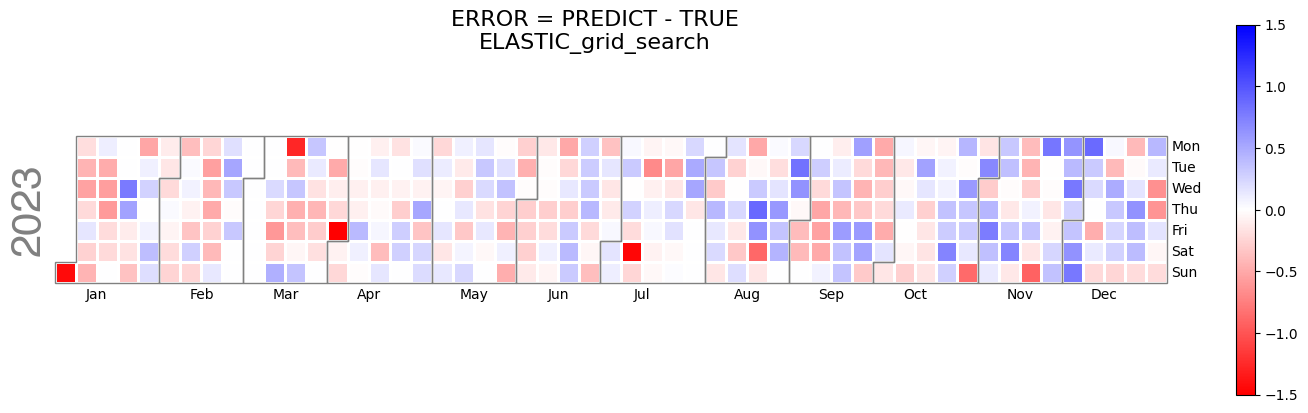

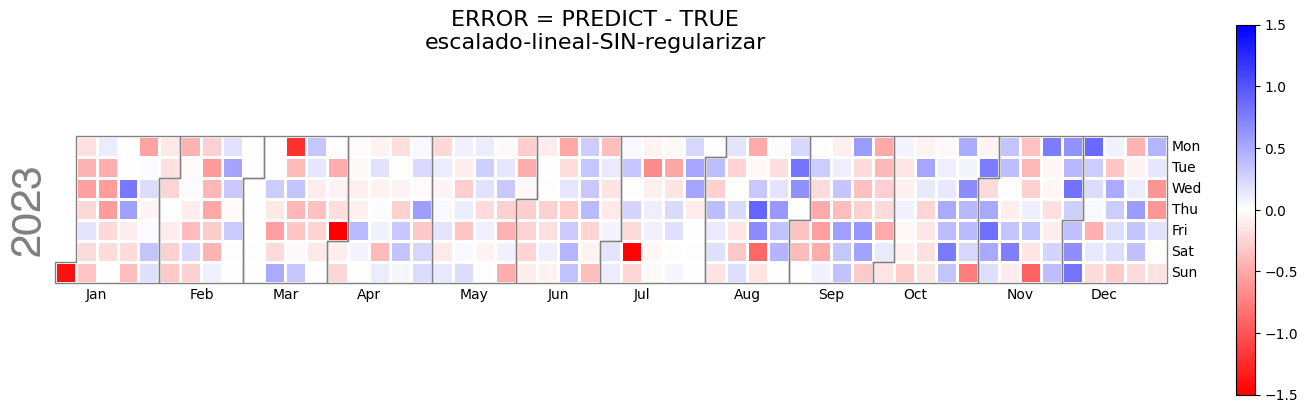

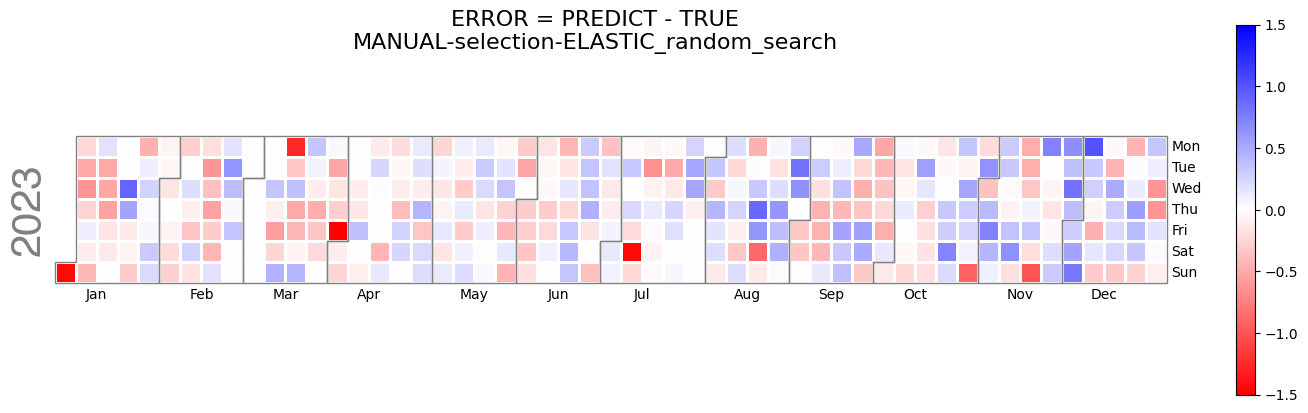

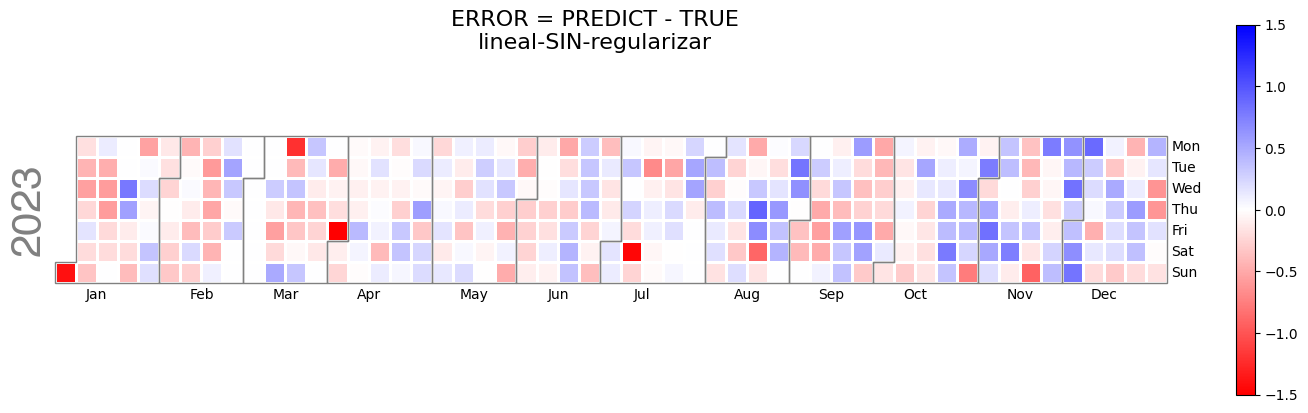

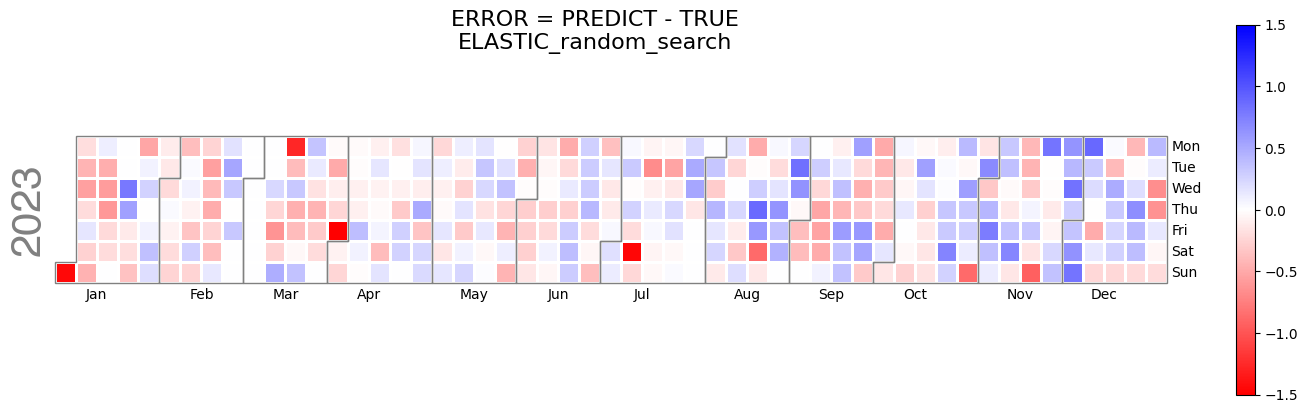

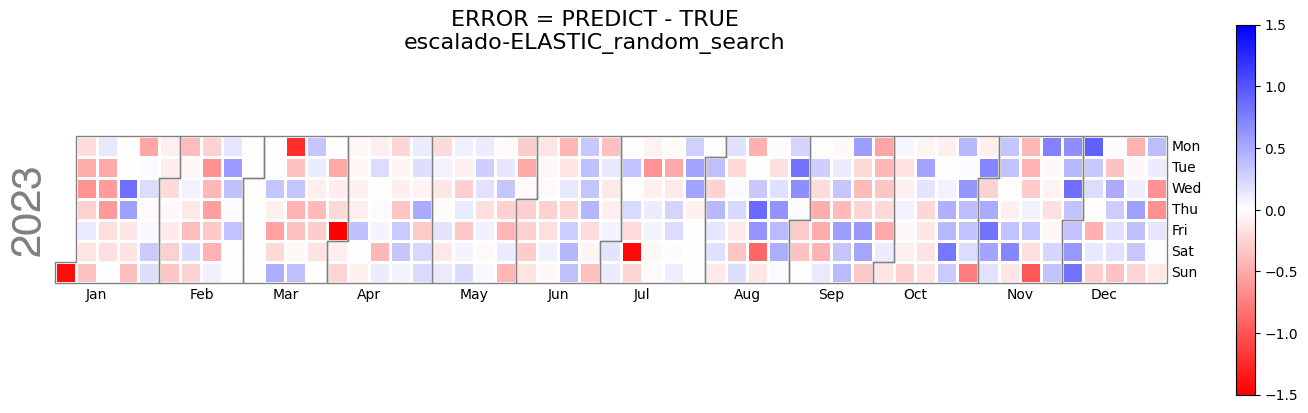

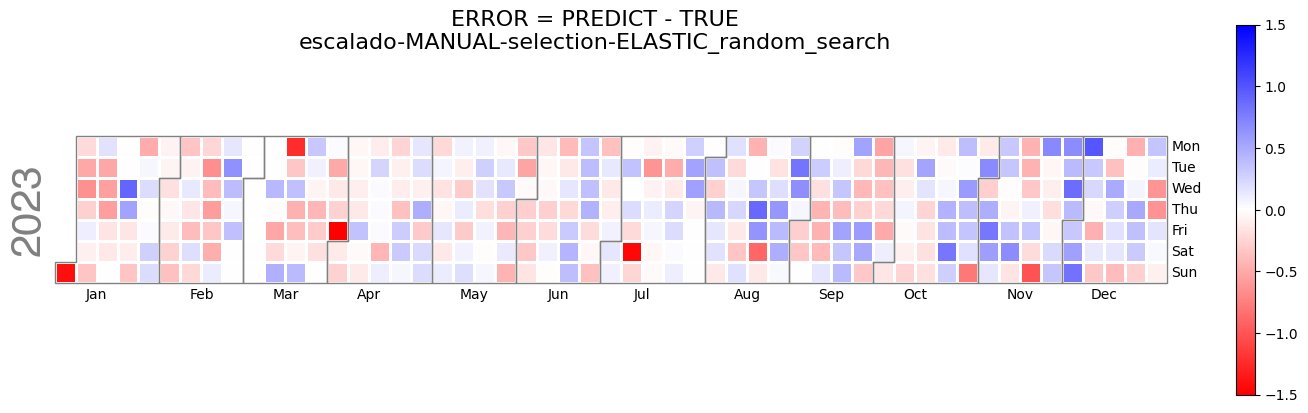

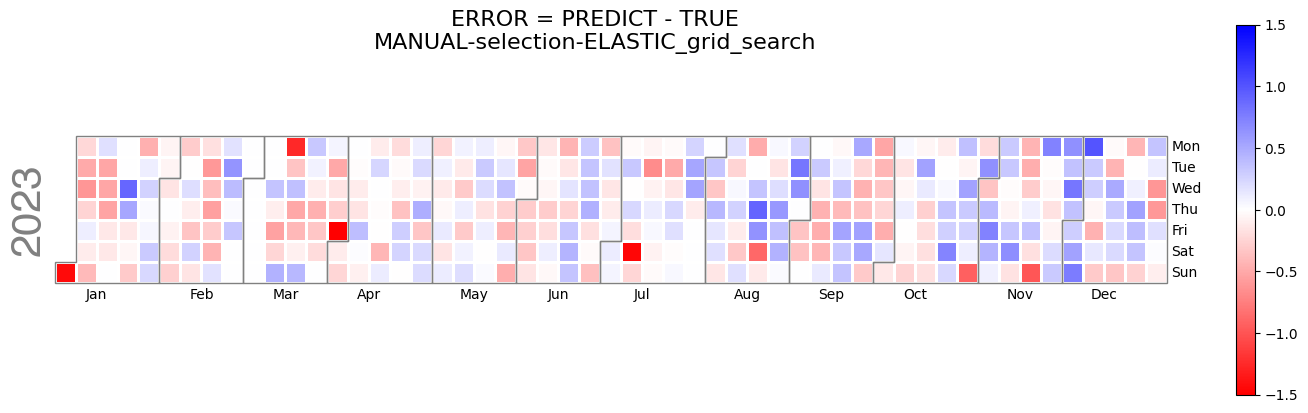

In [32]:

for i,m in enumerate(best_models):
    flo = MLFlow()
    # cargamos el modelo
    model = flo.get_saved_model(m)
    # pasamos numpy a Series
    y_pred = model.predict(to_model_input(X_train, X_test, m))
    
    diff = y_pred - y_test
    # para los colores https://stackoverflow.com/questions/16834861/create-own-colormap-using-matplotlib-and-plot-color-scale
    cvals  = [-2.5, 0, 2.5]
    colors = ['red', '1', 'blue']
    
    norm=plt.Normalize(min(cvals),max(cvals))
    tuples = list(zip(map(norm,cvals), colors))
    cmap = LinearSegmentedColormap.from_list("", tuples)
    plot_calendar(X_test, diff, 'ERROR = PREDICT - TRUE\n' + m, cmap, vmin=-1.5, vmax=1.5)


#### En general, podemos decir que los modelos tienden a sobreestimar las olas en la epoca de otoño - invierno (agosto-diciembre). Esto realmente se podría explicar con que la cantidad de olas de menor altura es mucho mayor que la cantidad de olas de mayor altura.


#### Además, hay muchos puntos rojos, indicando subestimación, algo muy importante pues no podemos poner en riesgo la salud de nuestros clientes, sobre todos niños pequeños, cuyos tutores legales podrían pensar que se trata de unas condiciones de calma, cuando realmente son olas peligrosas. Esto ocurre en ENERO sobre todo, donde, como vimos anteriormente, hay bastantes olas de gran altura.

### CONCLUSION

#### Hemos visto que los 8 modelos que hemos seleccionado son muy parecidos entre si

In [ ]:
flo = MLFlow()

# cargamos los modelos con sus variables respectivas
m = "esc_rf_con_grid_search"
modelo = flo.get_saved_model(m)